# HR EMPLOYEE ATTRITION ANALYSIS

> Employee attrition can be defined as the natural process in which the employees of an organization or an institution leave the workforce and are not immediately replaced. Loss of employees via attrition has severe impacts on the yield of an organization. Finding eligible candidates to replace the ones that have left is a daunting task. This is not only leads to higher costs but also induces a relatively inexperienced workforce in the organization. Continuous employee loss also disrupts the work chain and leads to delayed deadlines and lower customer satisfaction. Higher employee attrition diminishes the brand value of an organization.

> Understanding the motivations behind employee attrition is the essential first step in understanding the problem and properly addressing it before substantial, long-lasting damage is caused to the organization. In this section, we will try to find the pattern that may provide useful information in understanding why employees leave.


## DATA DESCRIPTIONS

> Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. 
The data set is a fictional data set created by IBM data scientists (https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

- Education
1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

- EnvironmentSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

- JobInvolvement
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

- JobSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

- PerformanceRating
1. 'Low'
2. 'Good'
3. 'Excellent'
4. 'Outstanding'

- RelationshipSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

- WorkLifeBalance
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'


## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
plt.style.use('ggplot')

## OVERVIEW

In [2]:
# load data
df = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [4]:
df.tail(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

> Based on the `.info()` above, we can see that the dataset is clean (as there are no null values) and contains 35 columns and 1470 rows. The data types on each features are also quite right.

In [6]:
pd.DataFrame({'Features' : df.columns, 'dataType' : df.dtypes.values, 
              'nullvalues' : [df[i].isna().sum() for i in df.columns],
              'unique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique())) for i in df.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,unique,uniqueSample
0,Age,int64,0,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
1,Attrition,object,0,2,"[Yes, No]"
2,BusinessTravel,object,0,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
3,DailyRate,int64,0,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
4,Department,object,0,3,"[Sales, Research & Development, Human Resources]"
5,DistanceFromHome,int64,0,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
6,Education,int64,0,5,"[2, 1, 4, 3, 5]"
7,EducationField,object,0,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
8,EmployeeCount,int64,0,1,[1]
9,EmployeeNumber,int64,0,1470,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."


> Based on the table above, we can see that the value for columns 'EmployeeCount', 'Over18', 'StandardHours' same for all rows, we can eliminate these columns.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [8]:
df.describe(include = object).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


> Based on two tables above, `.describe()` in the first table is the summary or the general information about the continous features on this dataset, it contained information about mean, standard deviation, minimum values, maximum values as well as the quantiles. And, `.describe()` in the second table is the general information of the categorical features in this dataset, it contained information about count, unique, top and freq. unique represent the different category, top represent the most common value, and freq are the most common value’s frequency

## PREPROCESS

In [9]:
# drop non-unique value features ('EmployeeCount', 'Over18', 'StandardHours') and column that not important for our analysis
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis="columns", inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

Since this dataset is very much clean from null values, all columns have unique values, as well as the data types are already matches the definitions. Now, we can go to the next step, Exploratory Data Analysis.

## EXPLORATORY DATA ANALYSIS

### TARGET FEATURES

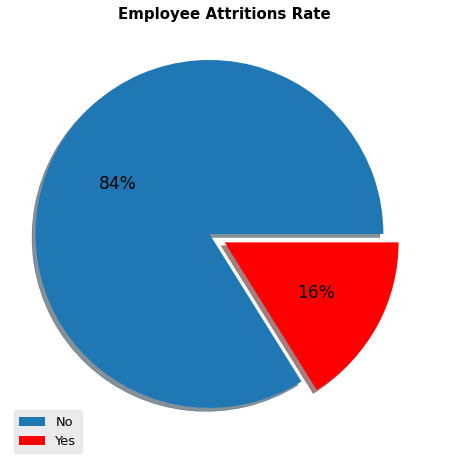

In [11]:
colorp = ["#1f77b4", "#ff0000"]
plt.figure(figsize = (12, 8))
plt.title('Employee Attritions Rate', size = 15, fontweight = 'bold', color = 'black')
labels = 'No', 'Yes'
plt.pie(df['Attrition'].value_counts(), autopct = '%.0f%%', 
        textprops = {'fontsize' : 17}, colors = colorp, explode = (0.1,0), shadow = True)
plt.legend(labels, loc='lower left', fontsize = 13)

plt.savefig('employeeattritionsrate.png')
plt.show()

> The attrition rates 16% seems to be oddly abit high and we will try to investigate this. We are going to separate the employees into two category according to Attrition and compare them

In [12]:
# convert attrition categorical column to numeric
y_dict = {"Yes":1,"No":0}
df["Attrition_numeric"] = df["Attrition"].map(y_dict)

In [13]:
df_cat = df.select_dtypes(['object'])
df_con = df.drop(columns = df_cat.columns)

### NUMERICAL FEATURES

In [14]:
df_con.head(3)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numeric
0,41,1102,1,2,2,94,3,2,4,5993,...,1,0,8,0,1,6,4,0,5,1
1,49,279,8,1,3,61,2,2,2,5130,...,4,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,4,92,2,1,3,2090,...,2,0,7,3,3,0,0,0,0,1


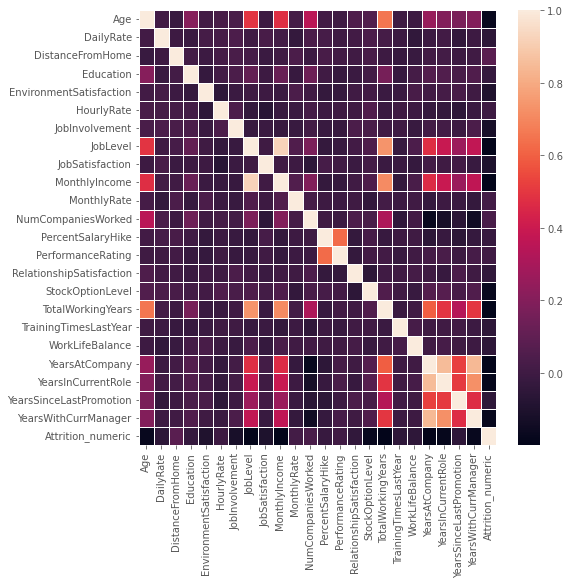

In [15]:
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(df_con.corr('spearman'), annot =False, linewidths=0.5, linecolor = "white", fmt=".1f", ax=ax)
plt.show()

In [16]:
con_corr = df_con.corr('spearman')
np.fill_diagonal(con_corr.values, np.nan)
con_corr_table = con_corr.unstack().sort_values(ascending = False).drop_duplicates().to_frame()
con_corr_table.columns = ['Correlation Coefficient']
con_corr_table.head(10)

Correlation Coefficient
MonthlyIncome      JobLevel                                0.920429
YearsAtCompany     YearsInCurrentRole                      0.854000
                   YearsWithCurrManager                    0.842803
JobLevel           TotalWorkingYears                       0.734678
YearsInCurrentRole YearsWithCurrManager                    0.724754
TotalWorkingYears  MonthlyIncome                           0.710024
                   Age                                     0.656896
PerformanceRating  PercentSalaryHike                       0.628519
TotalWorkingYears  YearsAtCompany                          0.594193
YearsAtCompany     YearsSinceLastPromotion                 0.519966

> We can see from spearman heatmap and table above, it show some features that has correlated to each other. 
>- Years at company, years in current role, years with current manager and years since last promotion have high correlation, but those are relationship between their working period which obviously correlates

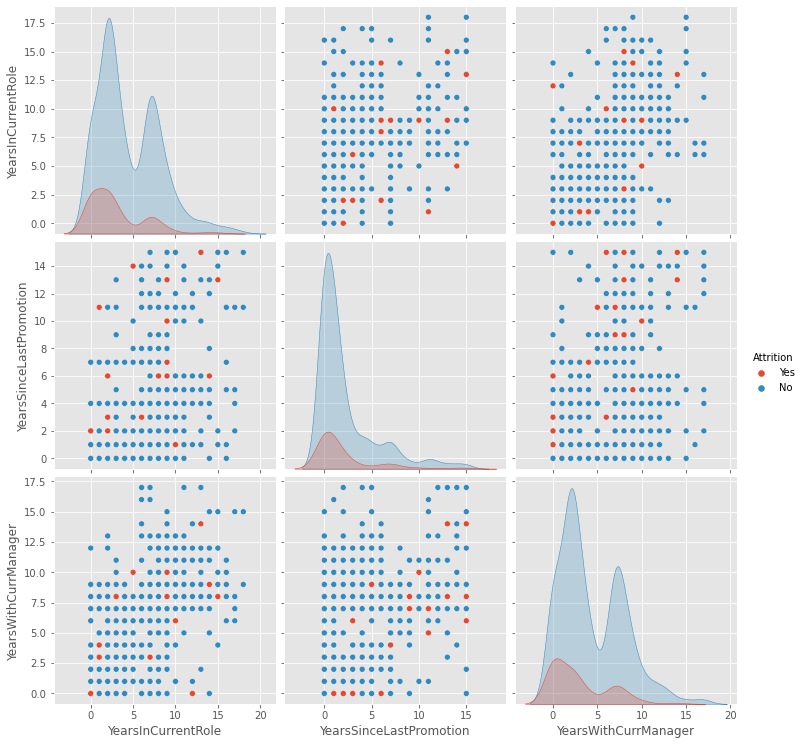

In [17]:
sns.pairplot(df.iloc[:,[1,28,29,30]], hue='Attrition', height = 3.5);

Since the scatterplot points are overlapped,its difficult to see the full distribution of data.

>- Job level and monthly income has perfect positive correlation, which means higher the job level, better the income. Also job level has high correlation with total working years, which means when the employee's year of working increases, he/she is being promoted based on seniority

<Figure size 720x360 with 0 Axes>

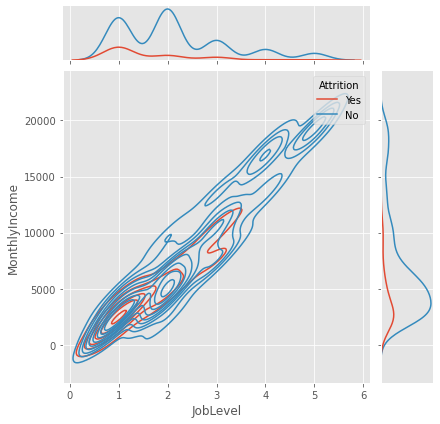

In [18]:
plt.figure(figsize=(10,5))
sns.jointplot(x='JobLevel', y='MonthlyIncome', data=df, hue = 'Attrition', kind='kde')
plt.savefig('jobmonth.png')

 Based on the plot above, we can see that
- Employees who had in the first job level were receiving lower income
-Most of the employees who got attrited had in the 0 - 3 job level and they were receiving less income
-Very few people from higher job level category and receiving higher income got attrited

>- There is also a correlation between monthly income and total working years, which means that employees earn higher income owing to their seniority with the firm. Also total working years has correlation with employee's age as we all know.

<Figure size 720x360 with 0 Axes>

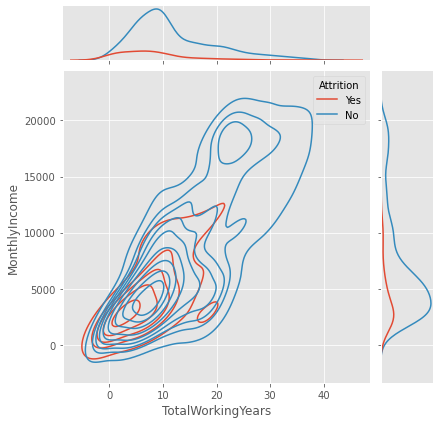

In [19]:
plt.figure(figsize=(10,5))
sns.jointplot(x='TotalWorkingYears', y='MonthlyIncome', data=df, hue = 'Attrition', kind='kde')
plt.savefig('twymonth.png')

 Based on the plot above, we can see that
- Employees who had less working years were receiving comparatively lower income
- Most of the employees who got attrited had less working years (0 - 15 years) and they were receiving less income
- Very few people from senior category and receiving higher income got attrited

In [20]:
con_corra_table = con_corr['Attrition_numeric'].sort_values(ascending = False).drop_duplicates().to_frame()
con_corra_table.columns = ['Correlation Coefficient']
con_corra_table.head(10)

,Correlation Coefficient
DistanceFromHome,0.079248
NumCompaniesWorked,0.030505
MonthlyRate,0.015258
PerformanceRating,0.002889
HourlyRate,-0.006692
PercentSalaryHike,-0.023612
Education,-0.030346
RelationshipSatisfaction,-0.042664
TrainingTimesLastYear,-0.051757
WorkLifeBalance,-0.051951


Since our target have no significant correlation with other features, it means that correlation doesn't necessarily prove impact the employee attrition. 
Here we will show the distribution of the first correlation coeff feature with target

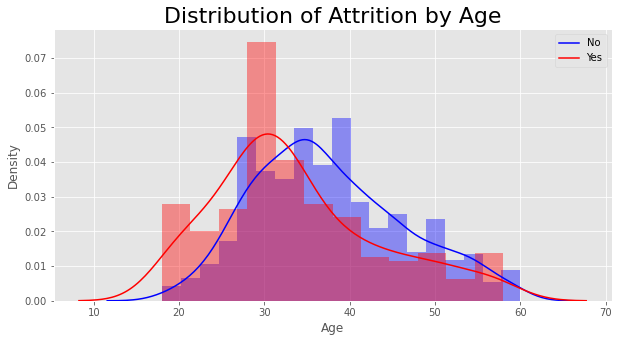

In [21]:
plt.figure(figsize = (10,5))
ax = sns.distplot(df[(df['Attrition_numeric'] == 0)]['Age'], color = 'blue')
ax = sns.distplot(df[(df['Attrition_numeric'] == 1)]['Age'], color = 'red')   
ax.legend(['No', 'Yes'])    
plt.xlabel('Age', fontsize = 12)
plt.title('Distribution of Attrition by Age', fontsize = 22)  
plt.savefig('distage.png')
plt.show()


From the plots above, we can see that the employee who are attrited and not attrited mostly varied between 2 to 10 unit distance from home.

### CATEGORICAL FEATURES

In [22]:
df_cat.head(3)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes


In [23]:
def cramersv(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [24]:
corr = []
for i in df_cat:
    matrix = []
    for j in df_cat:
        matrix.append(cramersv(df_cat[i], df_cat[j]))
    corr.append(matrix)

cat_corr = pd.DataFrame(corr, index = df_cat.columns, columns = df_cat.columns)

<AxesSubplot:>

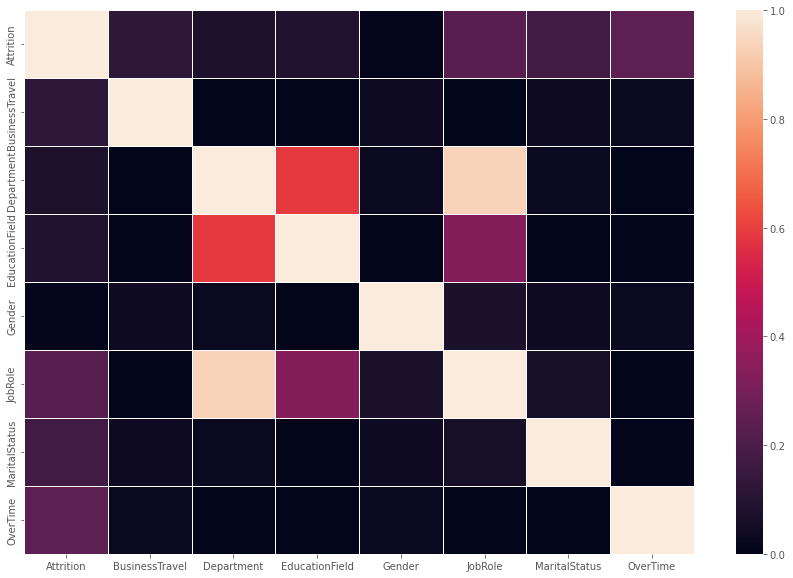

In [25]:
plt.figure(figsize = (15,10))
sns.heatmap(cat_corr, annot =False, linewidths=0.5, linecolor = "white", fmt=".1f")

In [26]:
np.fill_diagonal(cat_corr.values, np.nan)
cat_corr_table = cat_corr.dropna(how = 'all').unstack().sort_values(ascending = False).drop_duplicates().to_frame()
cat_corr_table.columns = ['Correlation Coefficient']
cat_corr_table.head(4)

,,Correlation Coefficient
JobRole,Department,0.937128
Department,JobRole,0.937128
EducationField,Department,0.587962
JobRole,EducationField,0.335546


> We can see from cramers'v heatmap and table above, it show some features that are correlated to each other.
>- Job role, department, and education field has high correlated with each other, but those are relationship between jobs and department corresponding to their level of education which obviously correlates

In [27]:
cat_corra_table = cat_corr['Attrition'].sort_values(ascending = False).drop_duplicates().to_frame()
cat_corra_table.columns = ['Correlation Coefficient']
cat_corra_table.head(7)

,Correlation Coefficient
OverTime,0.242749
JobRole,0.230701
MaritalStatus,0.173386
BusinessTravel,0.122880
EducationField,0.086617
Department,0.077375
Gender,0.008897


>- Over time, job role, marital status, business travel and education field has correlated with employee attrition. Although we can say that the correlation rather not significant, here I'll show the relationship between these features using `pd.crosstab()` below.

In [28]:
pd.crosstab(df_cat['OverTime'], df_cat['Attrition'], normalize = 'columns')

Attrition,No,Yes
OverTime,,
No,0.765612,0.464135
Yes,0.234388,0.535865


From the table above, we can infer that the employee who work overtime 54% attrited. While other are 76% from employee who doesn't work overtime no attrited. And so on,

In [29]:
pd.crosstab(df_cat['JobRole'], df_cat['Attrition'], normalize = 'columns')

Attrition,No,Yes
JobRole,,
Healthcare Representative,0.098946,0.037975
Human Resources,0.032441,0.050633
Laboratory Technician,0.159773,0.261603
Manager,0.078670,0.021097
Manufacturing Director,0.109489,0.042194
Research Director,0.063260,0.008439
Research Scientist,0.198702,0.198312
Sales Executive,0.218167,0.240506
Sales Representative,0.040552,0.139241


In [30]:
pd.crosstab(df_cat['MaritalStatus'], df_cat['Attrition'], normalize = 'columns')

Attrition,No,Yes
MaritalStatus,,
Divorced,0.238443,0.139241
Married,0.477697,0.354430
Single,0.283861,0.506329


In [31]:
pd.crosstab(df_cat['BusinessTravel'], df_cat['Attrition'], normalize = 'columns')

Attrition,No,Yes
BusinessTravel,,
Non-Travel,0.111922,0.050633
Travel_Frequently,0.168694,0.291139
Travel_Rarely,0.719384,0.658228


In [32]:
pd.crosstab(df_cat['EducationField'], df_cat['Attrition'], normalize = 'columns')

Attrition,No,Yes
EducationField,,
Human Resources,0.016221,0.029536
Life Sciences,0.419303,0.375527
Marketing,0.100568,0.147679
Medical,0.325223,0.265823
Other,0.057583,0.046414
Technical Degree,0.081103,0.135021


In [34]:
df_cat.groupby('Attrition')['JobRole'].value_counts()

Attrition  JobRole                  
No         Sales Executive              269
           Research Scientist           245
           Laboratory Technician        197
           Manufacturing Director       135
           Healthcare Representative    122
           Manager                       97
           Research Director             78
           Sales Representative          50
           Human Resources               40
Yes        Laboratory Technician         62
           Sales Executive               57
           Research Scientist            47
           Sales Representative          33
           Human Resources               12
           Manufacturing Director        10
           Healthcare Representative      9
           Manager                        5
           Research Director              2
Name: JobRole, dtype: int64

In [35]:
df_cat.groupby('Attrition')['OverTime', 'MaritalStatus'].value_counts()

Attrition  OverTime  MaritalStatus
No         No        Married          446
                     Single           284
                     Divorced         214
           Yes       Married          143
                     Divorced          80
                     Single            66
Yes        Yes       Single            65
           No        Single            55
           Yes       Married           43
           No        Married           41
           Yes       Divorced          19
           No        Divorced          14
dtype: int64

In [36]:
df_cat.groupby('Attrition')['Gender'].value_counts()

Attrition  Gender
No         Male      732
           Female    501
Yes        Male      150
           Female     87
Name: Gender, dtype: int64

In [37]:
df_cat.groupby('Attrition')['BusinessTravel'].value_counts()

Attrition  BusinessTravel   
No         Travel_Rarely        887
           Travel_Frequently    208
           Non-Travel           138
Yes        Travel_Rarely        156
           Travel_Frequently     69
           Non-Travel            12
Name: BusinessTravel, dtype: int64

In [38]:
df_cat.groupby('Attrition')['Department'].value_counts()

Attrition  Department            
No         Research & Development    828
           Sales                     354
           Human Resources            51
Yes        Research & Development    133
           Sales                      92
           Human Resources            12
Name: Department, dtype: int64

##### > Based on the plot above, we got the pattern for the client who attrited
>- They're mainly dominated by employee whose role job is sales executive, research scientist and laboratory technician 
>- Being single and working a lot overtime are important to take into account
>- Rarely do business travel
>- Mostly under research & development and sales department

## SUMMARY

Based on the EDA results, we can infer that monthly income is the main reason that makes employee attired. Monthly income is highly correlated by total working years and their job level, so most of the employees attired are employees who are junior level and 0 - 15 total years of working.

We found also that the employees attired are a single, rarely do business travel and come from the Research & Development and Sales departement, and more specifically those who had laboratory technicians, research scientist and sales representative as a job role.